In [438]:
import pandas as pd
import numpy as np
df = pd.read_excel("/Users/felixlaw/Personal_Projects-1/Jasmine's FYP/ML dataset sample.xlsx",header=1)
df = df.drop(columns= df.columns[:1]  , index=0)
df = df.drop(columns= df.columns[-1:] )
# df = df[df['Curing days (d)'] == 28]
df = df.replace(np.nan, 0)
df

,Natural moisture content,Sand,Silt,Clay,Specific Gravity,Max dry density,Optimum water content,Liquid Limit (%),Plastic Limit (%),SiO2,...,Total dosage,SiO2.1,Al2O3.1,CaO.1,Fe2O3.1,MgO.1,SO3.1,NaOH,UCS,Curing days (d)
1,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,28.2800,13.7800,43.040,0.4900,7.0200,4.230,0,0.0000,7.0
2,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,27.0295,13.1675,44.029,0.4655,6.7155,4.044,0,0.0000,7.0
3,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,25.7790,12.5550,45.018,0.4410,6.4110,3.858,0,0.0350,7.0
4,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,24.5285,11.9425,46.007,0.4165,6.1065,3.672,0,0.0625,7.0
5,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,23.2780,11.3300,46.996,0.3920,5.8020,3.486,0,0.0750,7.0
6,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,22.0275,10.7175,47.985,0.3675,5.4975,3.300,0,0.0750,7.0
7,100,0,0,0,2.72,0,0,60.0,23.6,0,...,7.058824,20.7770,10.1050,48.974,0.3430,5.1930,3.114,0,0.0625,7.0
8,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,28.2800,13.7800,43.040,0.4900,7.0200,4.230,0,0.0000,7.0
9,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,27.0295,13.1675,44.029,0.4655,6.7155,4.044,0,0.0000,7.0
10,100,0,0,0,2.72,0,0,60.0,23.6,0,...,9.411765,25.7790,12.5550,45.018,0.4410,6.4110,3.858,0,0.0700,7.0


In [439]:
df.columns

Index(['Natural moisture content', 'Sand', 'Silt', 'Clay ', 'Specific Gravity',
       'Max dry density', 'Optimum water content', 'Liquid Limit (%)',
       'Plastic Limit (%)', 'SiO2', 'Al2O3', 'CaO', 'Fe2O3', 'MgO', 'SO3',
       'Ignition loss (%)', 'Original', 'Total treated water content',
       'GGBS dosage', 'OPC dosage', 'Quicklime dosage', 'Fly ash dosage',
       'Carbide sludge dosage', 'Total dosage ', 'SiO2.1', 'Al2O3.1', 'CaO.1',
       'Fe2O3.1', 'MgO.1', 'SO3.1', 'NaOH', 'UCS', 'Curing days (d)'],
      dtype='object')

In [440]:
# Setup X and y variables
input_names = ['Natural moisture content', 'Sand', 'Silt', 'Clay ', 'Specific Gravity',
         'Liquid Limit (%)',
       'Plastic Limit (%)', 'SiO2', 'Al2O3', 'CaO', 'Fe2O3', 'MgO', 'SO3',
       'Ignition loss (%)', 'Original', 'Total treated water content',
        'SiO2.1', 'Al2O3.1', 'CaO.1',
       'Fe2O3.1', 'MgO.1', 'SO3.1', 'NaOH', 'UCS', 'Curing days (d)']

X = df[input_names].values

output_names = ['UCS', 'GGBS dosage', 'Total dosage ']

y = df[output_names].values
# print(y)
# y = df['UCS'].values
print(y[0])
print(len(X))

[0.         7.05882353 7.05882353]
41


Reference from: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [441]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [442]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print(y_test)
print(len(y_test))



[[0.65       0.68421053 1.        ]
 [0.24       0.36842105 1.        ]
 [0.         0.89473684 1.        ]
 [0.8        0.57894737 1.        ]
 [0.15       0.15789474 0.        ]
 [0.62       0.47368421 1.        ]
 [0.39       0.07894737 0.        ]
 [0.76       0.57894737 1.        ]
 [0.232      0.39473684 0.        ]]
9


In [443]:
# Building NN 
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=len(input_names), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(output_names)))
# model.add(Dense(1))

In [444]:
# Setting up the Loss Function and Optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [445]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                1664      
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6019 (23.51 KB)
Trainable params: 6019 (23.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [446]:
# Train the model 
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)

# Print the evaluation result
print("Test Loss:", loss)

Epoch 1/500
1/1 [==============================] - 0s 412ms/step - loss: 0.3482 - mean_squared_error: 0.3482 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 2/500
1/1 [==============================] - 0s 21ms/step - loss: 0.3206 - mean_squared_error: 0.3206 - val_loss: 0.3433 - val_mean_squared_error: 0.3433
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2948 - mean_squared_error: 0.2948 - val_loss: 0.3170 - val_mean_squared_error: 0.3170
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2714 - mean_squared_error: 0.2714 - val_loss: 0.2926 - val_mean_squared_error: 0.2926
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 0.2500 - mean_squared_error: 0.2500 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 0.2305 - mean_squared_error: 0.2305 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 7/500
1/1 [======================

1/1 [==============================] - 0s 18ms/step


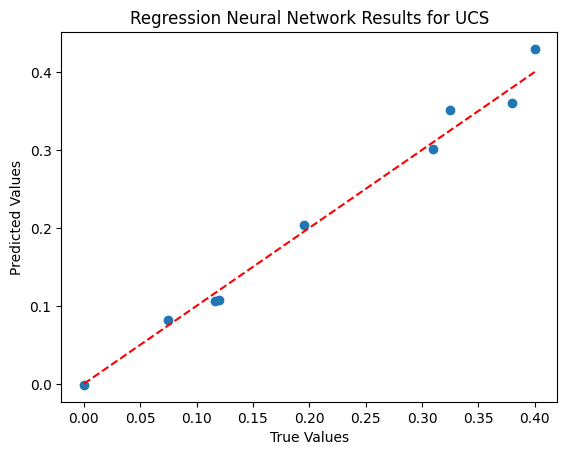

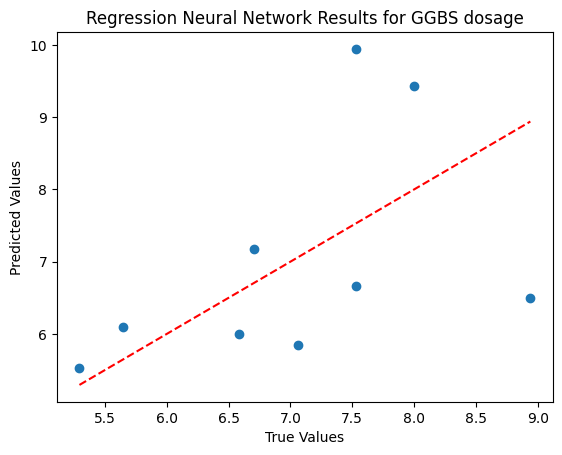

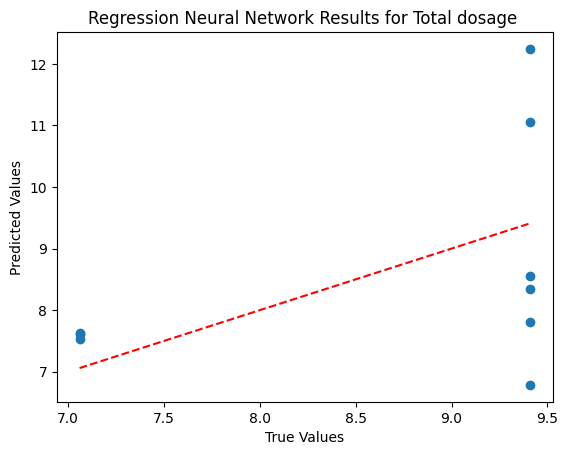

In [450]:
import matplotlib.pyplot as plt


# Assuming you have the true values stored in y_true and the predicted values stored in y_pred
y_pred = model.predict(X_test)

y_pred = sc.inverse_transform(y_pred)

y_test = sc.inverse_transform(y_test)

for i in range(len(y_pred[0])): 

    # y_pred_one_var = y_pred.T
    # y_test_one_var = y_test.T

    y_pred_one_var = y_pred.T[i]

    y_test_one_var = y_test.T[i]

    # Create a scatter plot or line plot
    plt.scatter(y_test_one_var, y_pred_one_var)  # or plt.plot(y_test_one_var, y_pred_one_var, 'bo')

    # Add labels and title
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Regression Neural Network Results for {output_names[i]}')

    # Add a diagonal line for reference (perfect predictions)
    plt.plot([min(y_test_one_var), max(y_test_one_var)], [min(y_test_one_var), max(y_test_one_var)], 'r--')  # diagonal line

    # Show the plot
    plt.show()

In [ ]:
#! Tesing on the testing dataset USELESS FOR REGRESSION
# from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_test)
# a = accuracy_score(y_pred,y_test)
# print('Accuracy is:', a*100)

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 65ms/step - loss: 0.3913 - mean_squared_error: 0.3913 - val_loss: 0.7189 - val_mean_squared_error: 0.7189
Epoch 2/300
1/1 [==============================] - 0s 31ms/step - loss: 0.3902 - mean_squared_error: 0.3902 - val_loss: 0.7185 - val_mean_squared_error: 0.7185
Epoch 3/300
1/1 [==============================] - 0s 23ms/step - loss: 0.3883 - mean_squared_error: 0.3883 - val_loss: 0.7179 - val_mean_squared_error: 0.7179
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 0.3858 - mean_squared_error: 0.3858 - val_loss: 0.7173 - val_mean_squared_error: 0.7173
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 0.3832 - mean_squared_error: 0.3832 - val_loss: 0.7167 - val_mean_squared_error: 0.7167
Epoch 6/300
1/1 [==============================] - 0s 24ms/step - loss: 0.3805 - mean_squared_error: 0.3805 - val_loss: 0.7152 - val_mean_squared_error: 0.7152
Epoch 7/300
1/1 [=======================

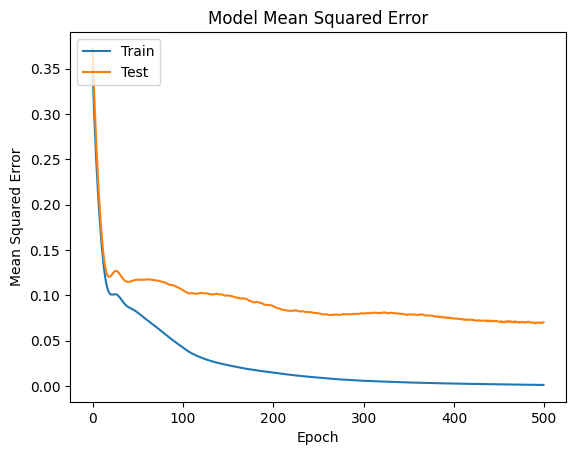

In [451]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()